# Time Series - Chicago Crime Rate

This project will implement Meta's open source software *Prophet* to predict crime rates in Chicago. Prophet is a procedure used for forecasting time series data based on an additive model, a nonparametric method of regression. In this model, nonlinear trends are fit with yearly, weekly, daily, seasonality, and even holiday effects. Prophet is commonly used for time series with strong seasonal effects and historical data. 

## The Dataset

The Chicago crime data set contains a summary of the reported crimes that occurred in the city of Chicago from 2001 up until present time. Data was obtained via the Chicago Police Department using the Citizen Law Enforcement Analysis and Reporting system. The dataset contains 22 variables, they are:

1. ID - Unique Identifier for the record
2. Case Number - The Chicago Police Department RD Number (Records Division Number), which is unique to the incident. 
3. Date - Date when the incident occurred.
4. Block - The partially redacted address where the incident occured, placing it on the same block as the actual address.
5. IUCR - The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at https://data.cityofchicago.org/d/c7ck-438e
6. Primary Type - The primary description of the IUCR code.
7. Description - The secondary description of the IUCR code, a subcategory of the primary description.
8. Location Description - Description of the location where the incident occurred.
9. Arrest - Indicates whether an arrest was made.
10. Domestic - Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
11. Beat - Indicates the beat where the indicdent occured. A best is the smallest police geographic area - each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats data at: https://data.cityofchicago.org/d/aerh-rz74
12. District - Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r
13. Ward - The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.org/d/sp34-6z76
14. Community Area - Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6
15. FBI Code - Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). See the Chicago Police Department listing of these classifications at http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html
16. X Coordinate - The x coordinate of the location where the incident occurred in the State Plane Illinois East NAD 1983 projections. This location is shifted from the actual location for partial redaction but falls on the same block.
17. Y Coordinate - The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.
18. Year - Year the incident occurred.
19. Updated On - Date and time the record was last updated.
20. Latitude - The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
21. Longitude - The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
22. Location - The location where the incident occurred in a format that allows for a creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.

**The data itself can be found at https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2**

## Import Data

In [1]:
import pandas as pd # for dataframe manipulations
import numpy as np # for numerical analysis
import seaborn as sns # for plotting and visualization
import matplotlib.pyplot as plt # for plotting and visualization
from fbprophet import Prophet 

C:\Users\chris\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\chris\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\chris\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
ChicagoData = pd.read_csv('Crimes_-_2001_to_Present.csv')

## Exploratory Data Analysis

Displaying the first 5 rows of data to get a glimpse of what the dataset looks like.

In [3]:
ChicagoData.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


The shape of our data tells us that we have 7,452,976 rows of data and 22 columns.

In [4]:
ChicagoData.shape

(7452976, 22)

Though there is a lot of data present, we will focus primarily on how many crimes occurr, the type of crime, and the datetime. This is because we are interested in the seasonality of the data. To check for missing elements, we will visualize the number of missing elements using a heatmap. The missing data points are present in the black "dots" or what look like "bars". Before visualization though, we will remove some of the variables that will not be used. 

In [5]:
ChicagoData.drop(['ID', 'Case Number', 'IUCR', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 
                  'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location'], 
                 axis = 1, inplace = True)

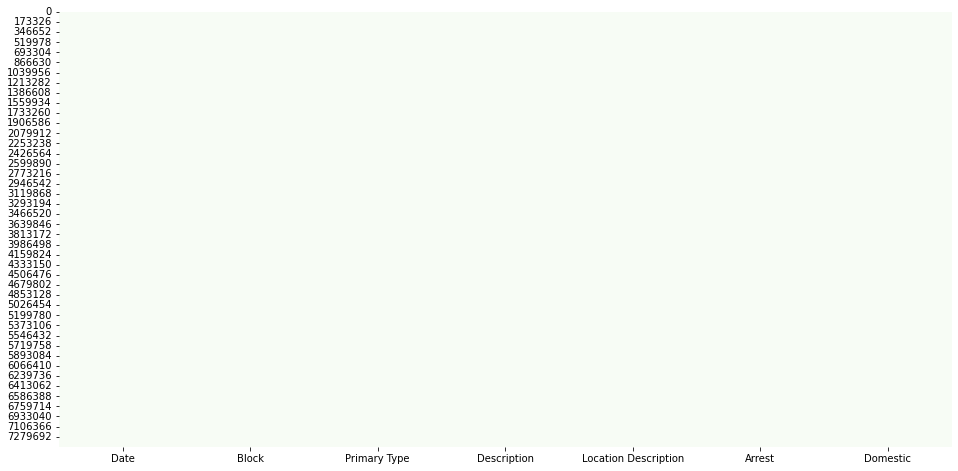

In [6]:
plt.figure(figsize = (16,8))
sns.heatmap(ChicagoData.isnull(), cbar = False, cmap = 'Greens');

We see that we have no missing data for the variables of interest. Next, we will assemble the date time by rearranging our dataframe column. That is, we want a DateTime format that Facebook Prophet can easily accept and manipulate for time series. To do this we use the pandas to_datetime on the Date column of our Chicago dataset. The Date is represented as month first, then day, year, and then the time in hours, minutes, seconds, a.m. or p.m.. 

In [7]:
ChicagoData.Date = pd.to_datetime(ChicagoData.Date, format = "%m/%d/%Y %I:%M:%S %p")

We will also set our Date column to be our index. This is to help forecast and resample later on.

In [8]:
ChicagoData.index = pd.DatetimeIndex(ChicagoData.Date)

In [9]:
ChicagoData.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2015-09-05 13:30:00,2015-09-05 13:30:00,043XX S WOOD ST,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True
2015-09-04 11:30:00,2015-09-04 11:30:00,008XX N CENTRAL AVE,THEFT,POCKET-PICKING,CTA BUS,False,False
2018-09-01 00:01:00,2018-09-01 00:01:00,082XX S INGLESIDE AVE,THEFT,OVER $500,RESIDENCE,False,True
2015-09-05 12:45:00,2015-09-05 12:45:00,035XX W BARRY AVE,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False
2015-09-05 13:00:00,2015-09-05 13:00:00,0000X N LARAMIE AVE,ASSAULT,SIMPLE,APARTMENT,False,True


Now that we have formatted our date column, we can easily visualize the number of cases where there was a robbery, prostitution, weapons violation, and so on within the the context of time. For now, we can simply visualize the value count. That is, counting the number of elements for each unique element in the column. For example, we can look at Primary Type. 

In [10]:
ChicagoData['Primary Type'].value_counts()

THEFT                                1568203
BATTERY                              1367197
CRIMINAL DAMAGE                       849888
NARCOTICS                             739921
ASSAULT                               478972
OTHER OFFENSE                         463345
BURGLARY                              414033
MOTOR VEHICLE THEFT                   344183
DECEPTIVE PRACTICE                    320850
ROBBERY                               279977
CRIMINAL TRESPASS                     208397
WEAPONS VIOLATION                      94607
PROSTITUTION                           69445
OFFENSE INVOLVING CHILDREN             52561
PUBLIC PEACE VIOLATION                 51339
SEX OFFENSE                            28861
CRIM SEXUAL ASSAULT                    27819
INTERFERENCE WITH PUBLIC OFFICER       17792
LIQUOR LAW VIOLATION                   14626
GAMBLING                               14607
ARSON                                  12657
HOMICIDE                               11612
KIDNAPPING

We can choose the top 15 Primary Type of violations and attain the indices and plot the count using the seaborn package.

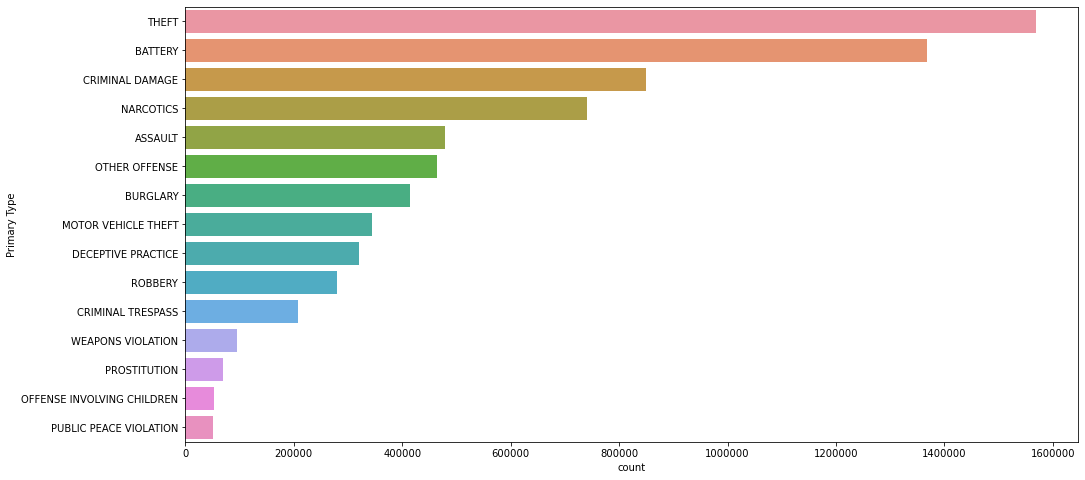

In [11]:
plt.figure(figsize = (16, 8))
sns.countplot(y = 'Primary Type', 
              data = ChicagoData, 
              order =  ChicagoData['Primary Type'].value_counts().iloc[:15].index)
plt.ticklabel_format(style='plain', axis='x');

We can also visualize how many of these cases were occured on the street, sidewalk, or residents using the location description variable in the dataset.

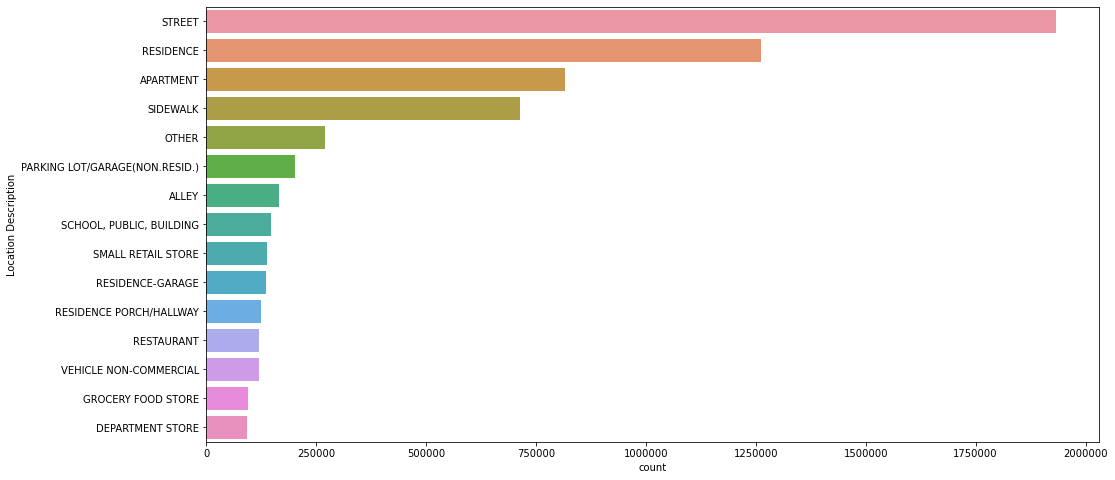

In [12]:
plt.figure(figsize = (16,8))
sns.countplot(y = 'Location Description', 
              data = ChicagoData,
             order = ChicagoData['Location Description'].value_counts().iloc[:15].index)
plt.ticklabel_format(style='plain', axis='x');

The visualization tells us that most crime occured on the street, followed by residence, and then apartment. Additionally, we can resample the data to count how many of these crimes occured within a specific year, month, or day. When sampling by year, 'Y', we can see the frequency of occurance in years from 2001 until 2021 along with the crimes corresponding to each year. We can even visualize this output next.

In [13]:
ChicagoData.resample('Y').size()

Date
2001-12-31    485821
2002-12-31    486778
2003-12-31    475969
2004-12-31    469410
2005-12-31    453756
2006-12-31    448152
2007-12-31    437067
2008-12-31    427136
2009-12-31    392799
2010-12-31    370447
2011-12-31    351927
2012-12-31    336209
2013-12-31    307397
2014-12-31    275663
2015-12-31    264610
2016-12-31    269646
2017-12-31    268879
2018-12-31    268501
2019-12-31    260879
2020-12-31    211454
2021-12-31    190476
Freq: A-DEC, dtype: int64

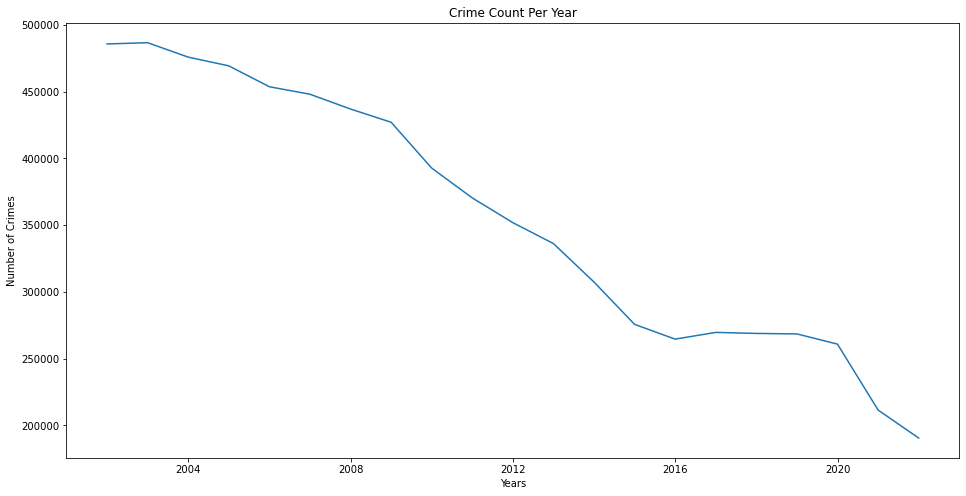

In [14]:
plt.figure(figsize = (16,8))
plt.plot(ChicagoData.resample('Y').size())
plt.title("Crime Count Per Year")
plt.xlabel('Years')
plt.ylabel("Number of Crimes");

Just as we resampled with frequency of year, we can both resample the frequency of month and visualize that frequency respectively. 

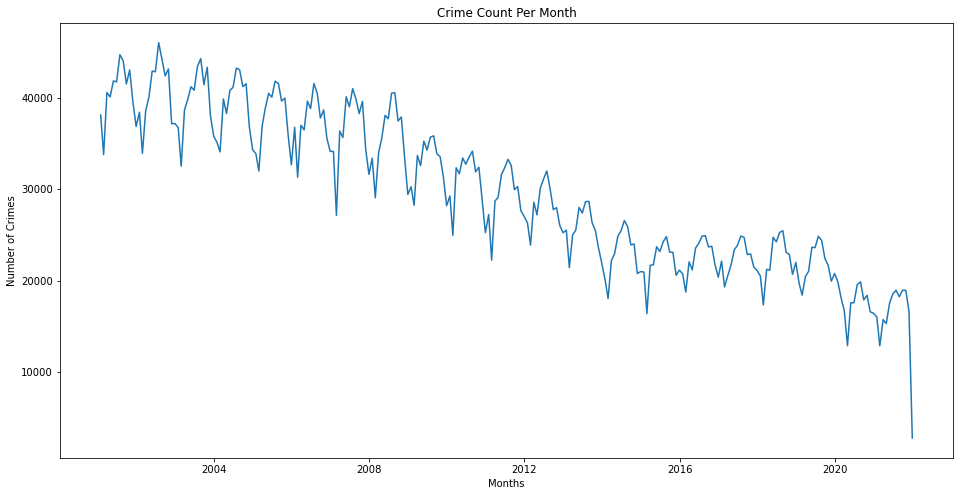

In [15]:
plt.figure(figsize = (16,8))
plt.plot(ChicagoData.resample('M').size())
plt.title("Crime Count Per Month")
plt.xlabel('Months')
plt.ylabel("Number of Crimes");

Similarly, we can also resample by quarter.

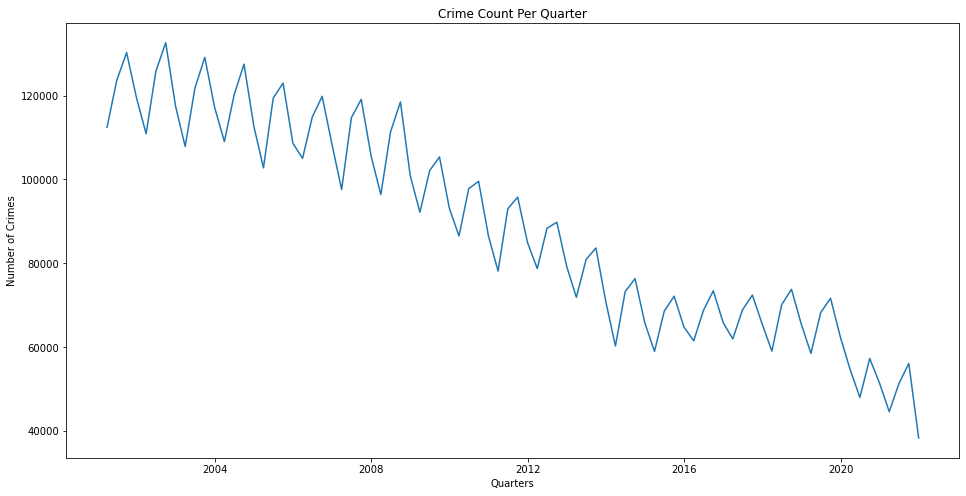

In [16]:
plt.figure(figsize = (16,8))
plt.plot(ChicagoData.resample('Q').size())
plt.title("Crime Count Per Quarter")
plt.xlabel('Quarters')
plt.ylabel("Number of Crimes");

After resampling by both month and quarters, we can immediately see that there is both trend and seasonality present in our dataset.

## Data Preprocessing

Though we have already modified our dataset for easy-use, we need to reset index to an increasing integer count. This will allow our Date data to become a column again. 

In [17]:
ChicagoProphet = ChicagoData.resample('M').size().reset_index()

In [18]:
ChicagoProphet

,Date,0
0,2001-01-31,38109
1,2001-02-28,33782
2,2001-03-31,40562
3,2001-04-30,40085
4,2001-05-31,41832
...,...,...
247,2021-08-31,18241
248,2021-09-30,18946
249,2021-10-31,18938
250,2021-11-30,16628


We see that we now need to rename our column names.

In [19]:
ChicagoProphet.columns = ['Date', 'Crime Count']

In [20]:
ChicagoProphet

,Date,Crime Count
0,2001-01-31,38109
1,2001-02-28,33782
2,2001-03-31,40562
3,2001-04-30,40085
4,2001-05-31,41832
...,...,...
247,2021-08-31,18241
248,2021-09-30,18946
249,2021-10-31,18938
250,2021-11-30,16628


In order to apply Facebook Prophet, we need the datetime to be renamed as ds and the value we are trying to predict.  

In [21]:
ChicagoProphet = ChicagoProphet.rename(columns = {'Date': 'ds', 'Crime Count':'y'})

In [22]:
ChicagoProphet

,ds,y
0,2001-01-31,38109
1,2001-02-28,33782
2,2001-03-31,40562
3,2001-04-30,40085
4,2001-05-31,41832
...,...,...
247,2021-08-31,18241
248,2021-09-30,18946
249,2021-10-31,18938
250,2021-11-30,16628


## Facebook Prophet Predictions

First, we will need to instantiate from Prophet. Next, we will fit the data. Finally, we will make predictions.

In [23]:
f = Prophet()
f.fit(ChicagoProphet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
future = f.make_future_dataframe(periods = 365) # periods = number of days to predict
forecast = f.predict(future)

In [25]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,41737.117317,37071.662221,40761.550293,41737.117317,41737.117317,-2879.889348,-2879.889348,-2879.889348,-2879.889348,-2879.889348,-2879.889348,0.0,0.0,0.0,38857.227969
1,2001-02-28,41679.873351,34195.596252,37942.494167,41679.873351,41679.873351,-5544.518689,-5544.518689,-5544.518689,-5544.518689,-5544.518689,-5544.518689,0.0,0.0,0.0,36135.354662
2,2001-03-31,41616.496103,38679.429785,42293.652126,41616.496103,41616.496103,-1180.511511,-1180.511511,-1180.511511,-1180.511511,-1180.511511,-1180.511511,0.0,0.0,0.0,40435.984592
3,2001-04-30,41555.163281,38332.549968,41995.755348,41555.163281,41555.163281,-1334.719075,-1334.719075,-1334.719075,-1334.719075,-1334.719075,-1334.719075,0.0,0.0,0.0,40220.444207
4,2001-05-31,41491.786033,40995.138939,44705.195268,41491.786033,41491.786033,1387.970766,1387.970766,1387.970766,1387.970766,1387.970766,1387.970766,0.0,0.0,0.0,42879.756799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,2022-12-27,15519.430621,19576.375041,23151.497328,15411.333933,15629.460752,5866.871748,5866.871748,5866.871748,5866.871748,5866.871748,5866.871748,0.0,0.0,0.0,21386.302369
613,2022-12-28,15515.860929,17484.923246,21259.788221,15407.120087,15626.604125,3746.724324,3746.724324,3746.724324,3746.724324,3746.724324,3746.724324,0.0,0.0,0.0,19262.585253
614,2022-12-29,15512.291237,15091.534033,18850.665835,15403.114121,15623.747239,1517.294449,1517.294449,1517.294449,1517.294449,1517.294449,1517.294449,0.0,0.0,0.0,17029.585686
615,2022-12-30,15508.721545,12965.304947,16444.580733,15399.039440,15620.885023,-781.116870,-781.116870,-781.116870,-781.116870,-781.116870,-781.116870,0.0,0.0,0.0,14727.604674


Facebook prophet takes the crime value to predict the future by creating a trend, upper bound and lower bound, and other valuable information. However, we are interested in visualizing crime rate predictions. To do this, we plot forecast from f. The visualization tells us the "predictions" for the future. Our original dataset ranges from 2001 to 2021, however, Facebook Prophet continues the trend forward a few years. 

The black dots on the plot are actual data points from the dataset. The blue line plot is the trend of the data. 

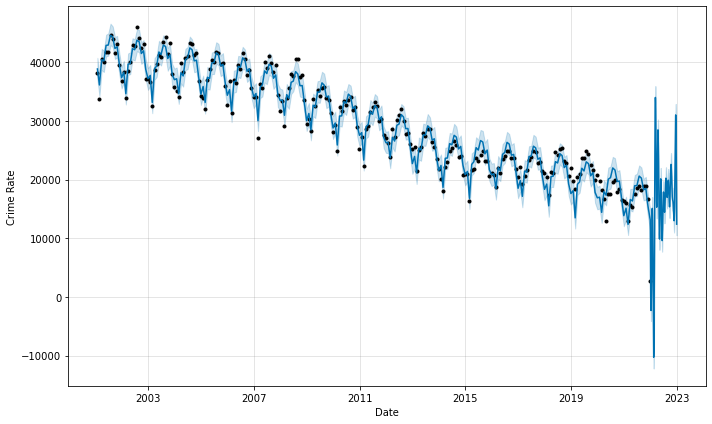

In [26]:
figure = f.plot(forecast, xlabel = 'Date', ylabel = 'Crime Rate')

We can also try to predict what will happen within a specific year. The following visualizations display the expected trend line and seasonality of crime.

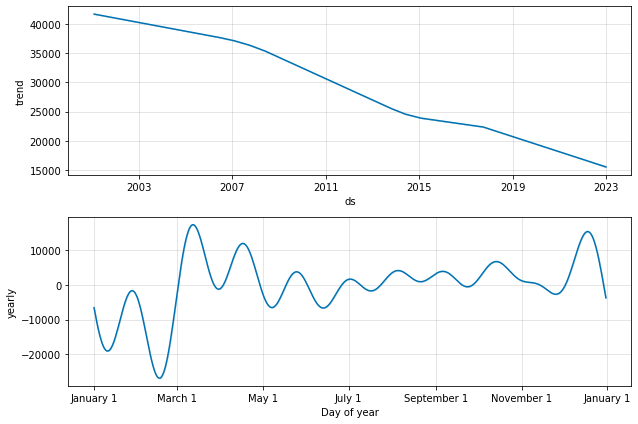

In [27]:
figure = f.plot_components(forecast)